In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

# Perform API Calls

* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [3]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [4]:
print("Beginning Data Retrieval ")
print("-----------------------------")

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : castro
Processing Record 2 of Set 1 : butaritari
Processing Record 3 of Set 1 : albany
Processing Record 4 of Set 1 : quatre cocos
Processing Record 5 of Set 1 : port alfred
Processing Record 6 of Set 1 : san policarpo
Processing Record 7 of Set 1 : broome
Processing Record 8 of Set 1 : puerto ayora
Processing Record 9 of Set 1 : cidreira
Processing Record 10 of Set 1 : mwinilunga
Processing Record 11 of Set 1 : cherskiy
Processing Record 12 of Set 1 : martapura
City not found. Skipping...
Processing Record 13 of Set 1 : cayenne
Processing Record 14 of Set 1 : ogaminana
Processing Record 15 of Set 1 : upernavik
Processing Record 16 of Set 1 : eregli
Processing Record 17 of Set 1 : hasaki
Processing Record 18 of Set 1 : sunnyside
Processing Record 19 of Set 1 : yellowknife
Processing Record 20 of Set 1 : mingyue
Processing Record 21 of Set 1 : isabela
Processing Record 22 of Set 1 : honolulu
Processin

# Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a Data Frame with the retrieve data
city_dict = pd.DataFrame({
                "City" : city_name_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Humidity" : humidity_list,
                "Cloudiness" : cloudiness_list,
                "Wind Speed" : wind_speed_list,
                "Country" : country_list,
                "Date" : date_list
            })

In [6]:
# Display fata frame describe to check dtype and non-null count
city_dict.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,5.570000e+02
mean,18.997856,16.123618,66.684183,70.791741,54.109515,7.750610,1.631915e+09
std,32.739821,91.853620,16.694762,21.202766,40.514682,5.190434,9.531795e+01
min,-54.800000,-179.166700,10.260000,2.000000,0.000000,0.200000,1.631914e+09
25%,-7.614200,-68.514500,54.280000,62.000000,10.000000,3.710000,1.631915e+09
50%,22.890900,18.957000,70.720000,76.000000,61.000000,6.460000,1.631915e+09
75%,43.323600,101.383300,79.300000,86.000000,97.000000,10.600000,1.631915e+09
max,78.218600,179.316700,104.430000,100.000000,100.000000,30.650000,1.631915e+09


In [7]:
# Store data into csv file
city_dict.to_csv(output_data_file, index = False)

# Inspect the data and remove the cities where the humidity > 100%
* Skip this step if there are no cities that have humidity > 100%.

In [8]:
# Check if there is any city with humidity over 100%
humidity_over_100 = city_dict.loc[city_dict['Humidity']>100]

In [95]:
# Count how many cities are over 100%
city_list_hum_over_100 = humidity_over_100.value_counts().tolist()

if city_list_hum_over_100:
    print(f'There are a total of {len(city_list_hum_over_100)} cities with humidity over 100%')
else:
    print('There are 0 cities with humidity over 100%')

There are 0 cities with humidity over 100%


Since there is no city over 100% in Humidity we can skip the cleaning process and continue with the steps

# Plotting the Data

* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.


## Latitude vs. Temperature Plot

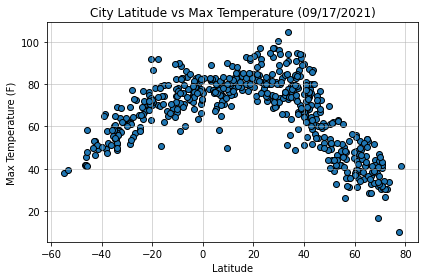

Max temperature is 104.43 F at Coachella with latitude at 33.6803


In [106]:
latitude = city_dict['Lat']
max_temp = city_dict['Max Temp']

city_with_max_temp = city_dict.loc[city_dict['Max Temp'] == city_dict['Max Temp'].max()]

# plotting scatter graph (latitude vs max_temp)
plt.scatter(latitude, max_temp,edgecolors= "black")

# Addign Title
plt.title('City Latitude vs Max Temperature (09/17/2021)')

# Addign Labels
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Adding grid
plt.grid(alpha=0.5, linewidth= 1)

# Tight layout for better presentation
plt.tight_layout()

# Show graph
plt.show()

print(f"Max temperature is {city_dict['Max Temp'].max()} F at {''.join(map(str,city_with_max_temp['City'].unique()))} with latitude at {''.join(map(str,city_with_max_temp['Lat'].unique()))}")

##  Latitude vs. Humidity Plot

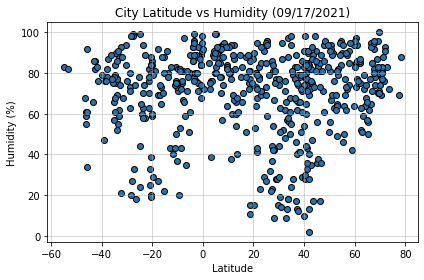

In [11]:
humidity = city_dict['Humidity']

# Plotting scatter graph of latitude vs humidity
plt.scatter(latitude, humidity, edgecolors='black')

# Adding Title
plt.title('City Latitude vs Humidity (09/17/2021)')

# Addign Labels
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Adding grid
plt.grid(alpha=0.5, linewidth= 1)

# Tight layout for better presentation
plt.tight_layout()

# Show graph
plt.show()

##  Latitude vs. Cloudiness Plot

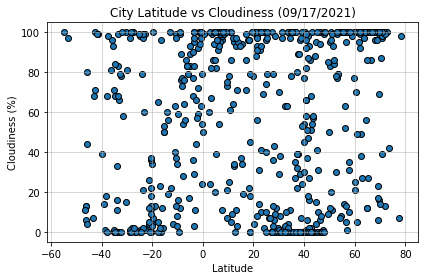

In [12]:
cloudiness = city_dict['Cloudiness']

# Plotting scatter graph of latitude vs humidity
plt.scatter(latitude, cloudiness, edgecolors='black')

# Adding Title
plt.title('City Latitude vs Cloudiness (09/17/2021)')

# Addign Labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Adding grid
plt.grid(alpha=0.5, linewidth= 1)

# Tight layout for better presentation
plt.tight_layout()

# Show graph
plt.show()

##  Latitude vs. Wind Speed Plot

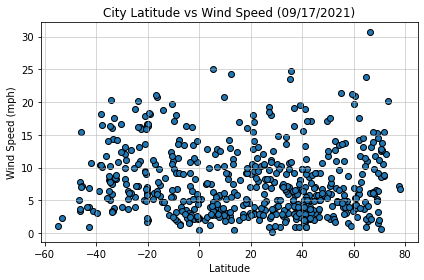

In [13]:
Wind_Speed = city_dict['Wind Speed']

# Plotting scatter graph of latitude vs humidity
plt.scatter(latitude, Wind_Speed, edgecolors='black')

# Adding Title
plt.title('City Latitude vs Wind Speed (09/17/2021)')

# Addign Labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Adding grid
plt.grid(alpha=0.5, linewidth= 1)

# Tight layout for better presentation
plt.tight_layout()

# Show graph
plt.show()

#  Linear Regression
##  Northern Hemisphere and Southern Hemisphere

In [14]:
# Create Northen and Southern Hemisphere
nothern_hemisphere = city_dict.loc[city_dict['Lat'] >= 0]
southern_hemisphere = city_dict.loc[city_dict['Lat'] < 0]

In [79]:
# Create a reusable function to calculate the regression line of a specific chart and return the line_eq
# It also graph the scatter plot and the line_eq into one graph and set xlable to latitude
def regression_line(x,y):
    slope, intercept, r, _, _ = linregress(x,y)
    print(f"The r-square value is: {r**2}")
    regress_value = slope * x + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y,edgecolors='black')
    plt.xlabel('Latitude')
    plt.plot(x,regress_value,"r-")
    return line_eq

# Create a reusable function to plot the regression line into the graph
# (h,w) are the location to draw the line
def annotate(line_eq,h,w):
    plt.annotate(line_eq,(h,w),fontsize=15,color='r')

## Northern Hemisphere - Temperature (F) vs. Latitude

The r-square value is: 0.6247370793869423


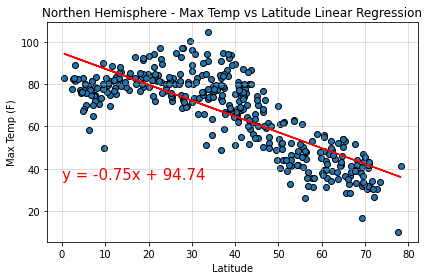

In [81]:
lat_north = nothern_hemisphere['Lat']
temp_north = nothern_hemisphere['Max Temp']

# Calculate regression line and annotate it to the graph
line_to_draw = regression_line(lat_north,temp_north)
annotate(line_to_draw, 0,35)

# Add title and labels
plt.title("Northen Hemisphere - Max Temp vs Latitude Linear Regression")
plt.ylabel('Max Temp (F)')

# Tight graph, grid and show
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

##  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square value is: 0.6354458046484932


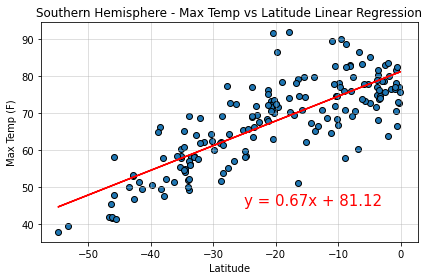

In [82]:
lat_south = southern_hemisphere['Lat']
temp_south = southern_hemisphere['Max Temp']

# Calculate regression line and annotate it to the graph
line_to_draw = regression_line(lat_south,temp_south)
annotate(line_to_draw, -25,45)

# Add title and labels
plt.title("Southern Hemisphere - Max Temp vs Latitude Linear Regression")
plt.ylabel('Max Temp (F)')

# Tight graph, grid and show
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

##  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square value is: 0.0025435216390297406


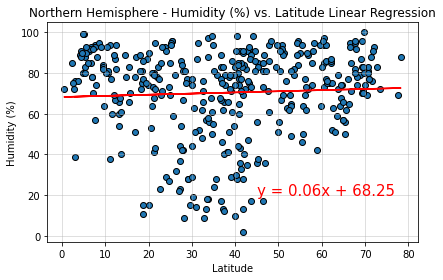

In [83]:
hum_north = nothern_hemisphere['Humidity']

# Calculate regression line and annotate it to the graph
line_to_draw = regression_line(lat_north,hum_north)
annotate(line_to_draw, 45,20)

# Add title and labels
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.ylabel('Humidity (%)')

# Tight graph, grid and show
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

## Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square value is: 0.014531986030983346


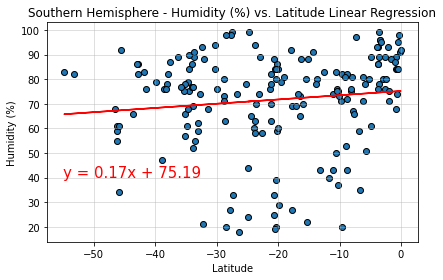

In [84]:
hum_south = southern_hemisphere['Humidity']

# Calculate regression line and annotate it to the graph
line_to_draw = regression_line(lat_south,hum_south)
annotate(line_to_draw, -55,40)

# Add title and labels
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.ylabel('Humidity (%)')

# Tight graph, grid and show
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

##  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square value is: 0.0014527121934098687


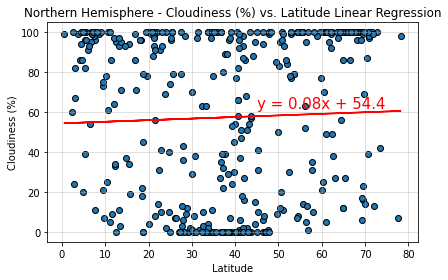

In [85]:
cloud_north = nothern_hemisphere['Cloudiness']

# Calculate regression line and annotate it to the graph
line_to_draw = regression_line(lat_north,cloud_north)
annotate(line_to_draw, 45,62)

# Add title and labels
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.ylabel('Cloudiness (%)')

# Tight graph, grid and show
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

##  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square value is: 0.040603199549695025


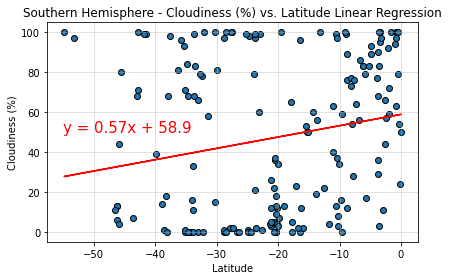

In [86]:
cloud_south = southern_hemisphere['Cloudiness']

# Calculate regression line and annotate it to the graph
line_to_draw = regression_line(lat_south,cloud_south)
annotate(line_to_draw, -55,50)

# Add title and labels
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.ylabel('Cloudiness (%)')

# Tight graph, grid and show
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

##  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square value is: 0.010257974122873615


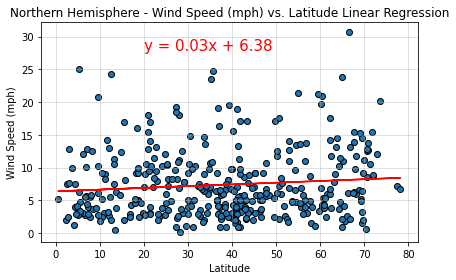

In [87]:
wind_north = nothern_hemisphere['Wind Speed']

# Calculate regression line and annotate it to the graph
line_to_draw = regression_line(lat_north,wind_north)
annotate(line_to_draw, 20,28)

# Add title and labels
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.ylabel('Wind Speed (mph)')

# Tight graph, grid and show
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

##  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square value is: 0.012305341607787654


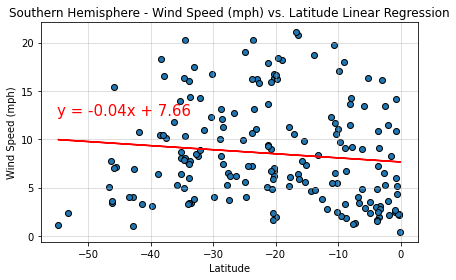

In [88]:
wind_south = southern_hemisphere['Wind Speed']

# Calculate regression line and annotate it to the graph
line_to_draw = regression_line(lat_south,wind_south)
annotate(line_to_draw, -55,12.5)

# Add title and labels
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.ylabel('Wind Speed (mph)')

# Tight graph, grid and show
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()